In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##IHC-Color Separation and followed By Cell Nuclei Segmentation.

In [2]:
!pip install stardist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 14.0 MB/s 
     |████████████████████████████████| 69 kB 8.9 MB/s 
     |████████████████████████████████| 2.9 MB 54.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [3]:
from stardist.models import StarDist2D 
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from skimage import io


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
#ihc_rgb = data.immunohistochemistry()
ihc_rgb0 =io.imread("/content/drive/MyDrive/IHC_TRAIN/train_jpg/0/0.373.jpg")
ihc_rgb1 =io.imread("/content/drive/MyDrive/IHC_TRAIN/train_jpg//1/1.19.jpg")
ihc_rgb2 =io.imread("/content/drive/MyDrive/IHC_TRAIN/train_jpg/2/2.43.jpg")
ihc_rgb3 =io.imread("/content/drive/MyDrive/IHC_TRAIN/train_jpg/3/3.769.jpg")

# Separate the stains from the IHC image
ihc_hed0 = rgb2hed(ihc_rgb0)
ihc_hed1 = rgb2hed(ihc_rgb1)
ihc_hed2 = rgb2hed(ihc_rgb2)
ihc_hed3 = rgb2hed(ihc_rgb3)


# Create an RGB image for each of the stains
null0 = np.zeros_like(ihc_hed0[:, :, 0])
ihc_h0 = hed2rgb(np.stack((ihc_hed0[:, :, 0], null0, null0), axis=-1))
ihc_d0 = hed2rgb(np.stack((null0, null0, ihc_hed0[:, :, 2]), axis=-1))

null1 = np.zeros_like(ihc_hed0[:, :, 0])
ihc_h1 = hed2rgb(np.stack((ihc_hed1[:, :, 0], null1, null1), axis=-1))
ihc_d1 = hed2rgb(np.stack((null1, null1, ihc_hed1[:, :, 2]), axis=-1))

null2 = np.zeros_like(ihc_hed0[:, :, 0])
ihc_h2 = hed2rgb(np.stack((ihc_hed2[:, :, 0], null2, null2), axis=-1))
ihc_d2 = hed2rgb(np.stack((null2, null2, ihc_hed2[:, :, 2]), axis=-1))

null3 = np.zeros_like(ihc_hed0[:, :, 0])
ihc_h3 = hed2rgb(np.stack((ihc_hed3[:, :, 0], null3, null3), axis=-1))
ihc_d3 = hed2rgb(np.stack((null3, null3, ihc_hed3[:, :, 2]), axis=-1))



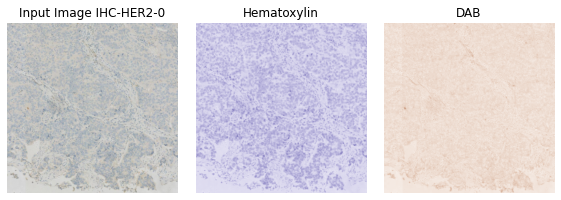

In [7]:
# Display
fig0, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb0)
ax[0].set_title("Input Image IHC-HER2-0")

ax[1].imshow(ihc_h0)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d0)
ax[2].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig0.tight_layout()

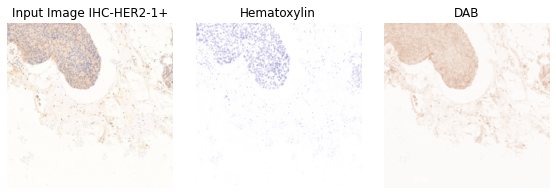

In [8]:
# Display
fig1, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb1)
ax[0].set_title("Input Image IHC-HER2-1+")

ax[1].imshow(ihc_h1)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d1)
ax[2].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig1.tight_layout()

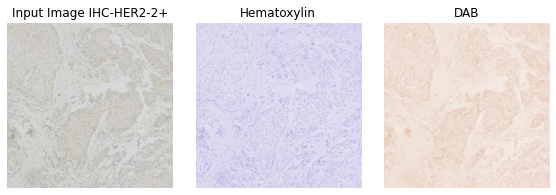

In [9]:
# Display
fig2, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb2)
ax[0].set_title("Input Image IHC-HER2-2+")

ax[1].imshow(ihc_h2)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d2)
ax[2].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig2.tight_layout()

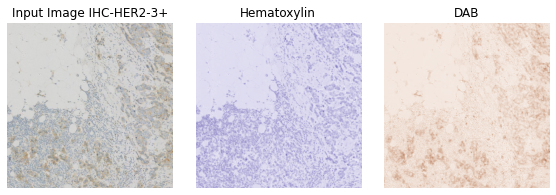

In [10]:
# Display
fig3, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb3)
ax[0].set_title("Input Image IHC-HER2-3+")

ax[1].imshow(ihc_h3)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d3)
ax[2].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig3.tight_layout()

In [11]:
model = StarDist2D.from_pretrained('2D_versatile_he')


Found model '2D_versatile_he' for 'StarDist2D'.
5294730/5294730 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [12]:
he_labels0, _ = model.predict_instances(normalize(ihc_h0))

1/1 [==============================] - 11s 11s/step


Text(0.5, 1.0, 'Output IHC-HER2-0')

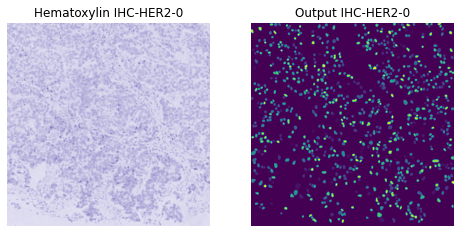

In [13]:
plt.rcParams["figure.figsize"] = (8,4)
plt.subplot(1,2,1)
plt.imshow(ihc_h0, cmap="gray")
plt.axis("off")
plt.title("Hematoxylin IHC-HER2-0")

plt.subplot(1,2,2)
plt.imshow(he_labels0)
plt.axis("off")
plt.title("Output IHC-HER2-0")

In [14]:
he_labels1, _ = model.predict_instances(normalize(ihc_h1))

1/1 [==============================] - 0s 23ms/step


Text(0.5, 1.0, 'Output Image IHC-HER2-1+')

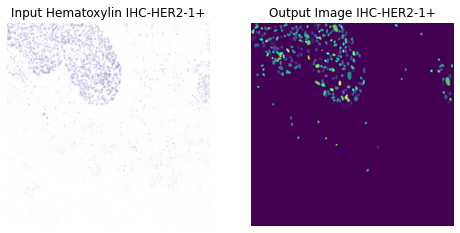

In [15]:
plt.rcParams["figure.figsize"] = (8,4)
plt.subplot(1,2,1)
plt.imshow(ihc_h1, cmap="gray")
plt.axis("off")
plt.title("Input Hematoxylin IHC-HER2-1+")

plt.subplot(1,2,2)
plt.imshow(he_labels1)
plt.axis("off")
plt.title("Output Image IHC-HER2-1+")

In [16]:
he_labels2, _ = model.predict_instances(normalize(ihc_h2))

1/1 [==============================] - 0s 23ms/step


Text(0.5, 1.0, 'Output Image IHC-HER2-2+')

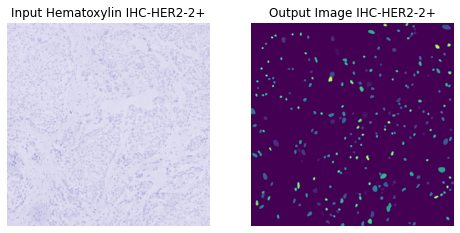

In [17]:
plt.rcParams["figure.figsize"] = (8,4)
plt.subplot(1,2,1)
plt.imshow(ihc_h2, cmap="gray")
plt.axis("off")
plt.title("Input Hematoxylin IHC-HER2-2+")

plt.subplot(1,2,2)
plt.imshow(he_labels2)
plt.axis("off")
plt.title("Output Image IHC-HER2-2+")

In [18]:
he_labels3, _ = model.predict_instances(normalize(ihc_h3))

1/1 [==============================] - 0s 37ms/step


Text(0.5, 1.0, 'Output Image IHC-HER2-3+')

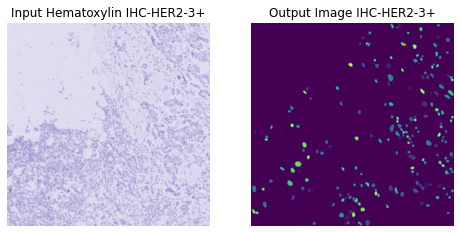

In [19]:
plt.rcParams["figure.figsize"] = (8,4)
plt.subplot(1,2,1)
plt.imshow(ihc_h3, cmap="gray")
plt.axis("off")
plt.title("Input Hematoxylin IHC-HER2-3+")

plt.subplot(1,2,2)
plt.imshow(he_labels3)
plt.axis("off")
plt.title("Output Image IHC-HER2-3+")

In [20]:
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h0 = rescale_intensity(ihc_hed0[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed0[:, :, 0], 99)))
d0 = rescale_intensity(ihc_hed0[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed0[:, :, 2], 99)))

h1 = rescale_intensity(ihc_hed1[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed1[:, :, 0], 99)))
d1 = rescale_intensity(ihc_hed1[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed1[:, :, 2], 99)))

h2 = rescale_intensity(ihc_hed2[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed2[:, :, 0], 99)))
d2 = rescale_intensity(ihc_hed2[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed2[:, :, 2], 99)))

h3 = rescale_intensity(ihc_hed3[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed3[:, :, 0], 99)))
d3 = rescale_intensity(ihc_hed3[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed3[:, :, 2], 99)))

# Cast the two channels into an RGB image, as the blue and green channels
# respectively
zdh0 = np.dstack((null0, d0, h0))
zdh1 = np.dstack((null1, d1, h1))
zdh2 = np.dstack((null2, d2, h2))
zdh3 = np.dstack((null3, d3, h3))


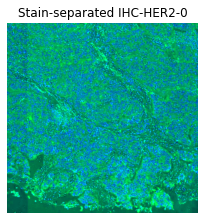

In [30]:
fig = plt.figure()
axis = plt.subplot(1, 1, 1,sharex=ax[0], sharey=ax[0])
axis.imshow(zdh0)
axis.set_title('Stain-separated IHC-HER2-0')
axis.axis('off')
plt.gcf().set_size_inches(7, 3.5)
plt.show()

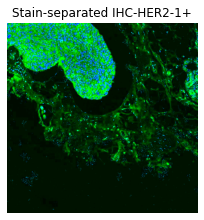

In [31]:
fig = plt.figure()
axis = plt.subplot(1, 1, 1,sharex=ax[0], sharey=ax[0])
axis.imshow(zdh1)
axis.set_title('Stain-separated IHC-HER2-1+')
axis.axis('off')
plt.gcf().set_size_inches(7, 3.5)
plt.show()

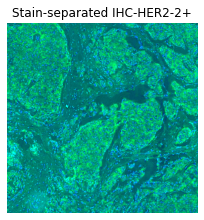

In [32]:
fig = plt.figure()
axis = plt.subplot(1, 1, 1,sharex=ax[0], sharey=ax[0])
axis.imshow(zdh2)
axis.set_title('Stain-separated IHC-HER2-2+')
axis.axis('off')
plt.gcf().set_size_inches(7, 3.5)
plt.show()

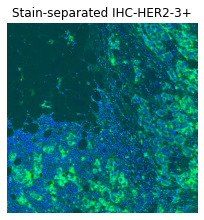

In [33]:
fig = plt.figure()
axis = plt.subplot(1, 1, 1,sharex=ax[0], sharey=ax[0])
axis.imshow(zdh3)
axis.set_title('Stain-separated IHC-HER2-3+')
axis.axis('off')
plt.gcf().set_size_inches(7, 3.5)
plt.show()